# Setup


In [1]:
import skimage.morphology as morph
import numpy as np
import utils


## Loading the image


Reading image: images/input/noisy.png (348x458)


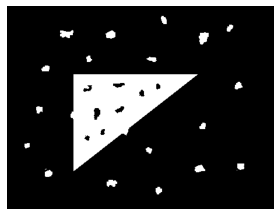

In [2]:
image = utils.read_image("noisy.png")
binary_image = image != 0
utils.show_image(binary_image)


# Task 3a

Use what you know about erosion, dilation, opening, and closing to remove the noisy elements from the image.


In [3]:
def remove_noise(binary_image: np.ndarray) -> np.ndarray:
    result = binary_image
    structuring_element = morph.disk(8)

    # Remove black noise inside triangle (close its holes)
    result = morph.binary_closing(result, structuring_element)
    # Remove the white noise outside triangle ("open" the white noise)
    result = morph.binary_opening(result, structuring_element)

    return result


## Testing the function


Saving image to: images/output/task3a.png


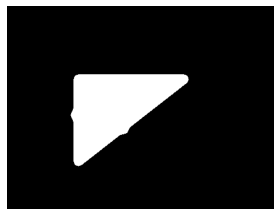

In [4]:
noise_free_image = remove_noise(binary_image)

assert (
    image.shape == noise_free_image.shape
), f"Expected image shape ({image.shape}) to be same as resulting image shape ({noise_free_image.shape})"
assert (
    noise_free_image.dtype == np.bool
), f"Expected resulting image dtype to be np.bool. Was: {noise_free_image.dtype}"

utils.show_image(noise_free_image, save_as="task3a.png")


# Task 3b

Implement the distance transform using the erosion method explained below.

> The distance transform is an operation typically applied on a binary image and creates a grayscale image where each foreground pixel shows the distance to the closest boundary pixel. The chessboard distance is the minimum number of moves a king has to perform to move from one square (or pixel in our case) to another square in the game of chess.

> One inefficient way of calculating the distance transform is to use erosion. Intuitively, by using erosion the distance transform for a pixel is simply the number of erosion operations it took to remove it from the foreground of the original image.

You can use a 3 × 3 structuring element of all ones to get chessboard distance.

Test the function on the noise free binary image you got from task (a) and show the result in your report.


In [5]:
structuring_element = np.ones((3, 3), dtype=bool)


In [6]:
def distance_transform(
    binary_image: np.ndarray, structuring_element: np.ndarray
) -> np.ndarray:

    rows, columns = binary_image.shape
    result = np.zeros((rows, columns), dtype=np.int32)
    previous_iteration = binary_image
    steps = 0
    # continue until all pixels are 0
    while previous_iteration.any():
        steps += 1

        # perform an erosion operation on the previous iteration
        this_iteration = morph.binary_erosion(previous_iteration, structuring_element)

        # Set value of pixels that were removed this iteration to the number of steps it took to remove it
        for row in range(rows):
            for column in range(columns):
                if this_iteration[row, column] != previous_iteration[row, column]:
                    result[row, column] = steps

        previous_iteration = this_iteration

    return result


## Testing the function


Saving image to: images/output/task3b.png


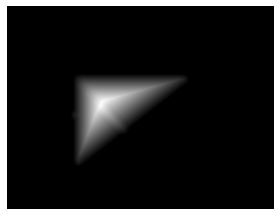

In [7]:
distance = distance_transform(noise_free_image, structuring_element)

assert (
    distance.shape == image.shape
), f"Expected image shape ({image.shape}) to be same as resulting image shape ({distance.shape})"
assert (
    distance.dtype == np.int32
), f"Expected resulting image dtype to be np.int32. Was: {distance.dtype}"

utils.show_image(distance, save_as="task3b.png")
